In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [3]:
df.shape

(2956, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [5]:
for i in df:
    a=df[i].isnull().value_counts()
    print(a)

Date
False    2956
Name: count, dtype: int64
Open
False    2956
Name: count, dtype: int64
High
False    2956
Name: count, dtype: int64
Low
False    2956
Name: count, dtype: int64
Close
False    2956
Name: count, dtype: int64
Adj Close
False    2956
Name: count, dtype: int64
Volume
False    2956
Name: count, dtype: int64


In [6]:
df[df.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


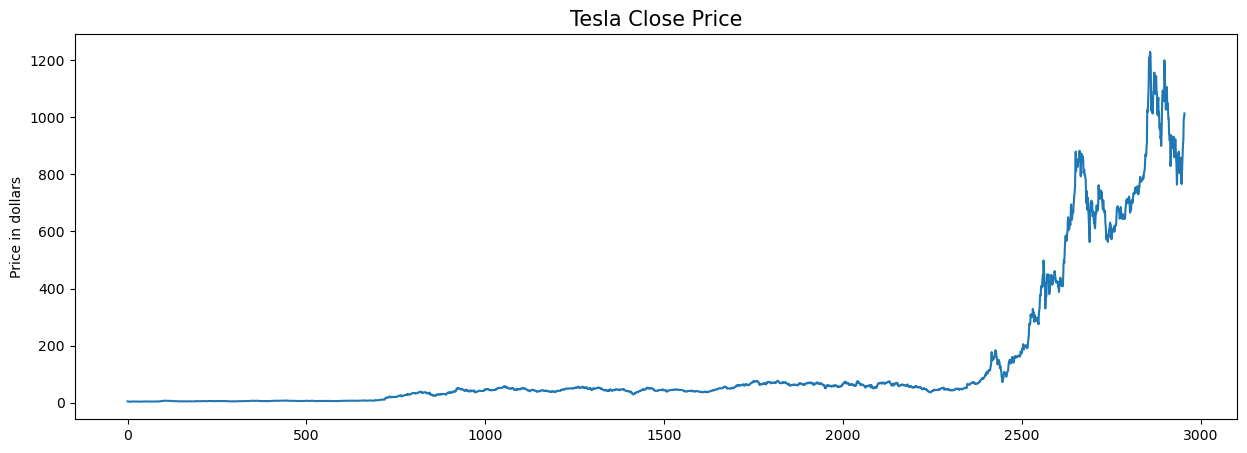

In [8]:
plt.figure(figsize=(15,5))
plt.plot(df["Close"])
plt.title("Tesla Close Price",fontsize=15)
plt.ylabel("Price in dollars")
plt.show()

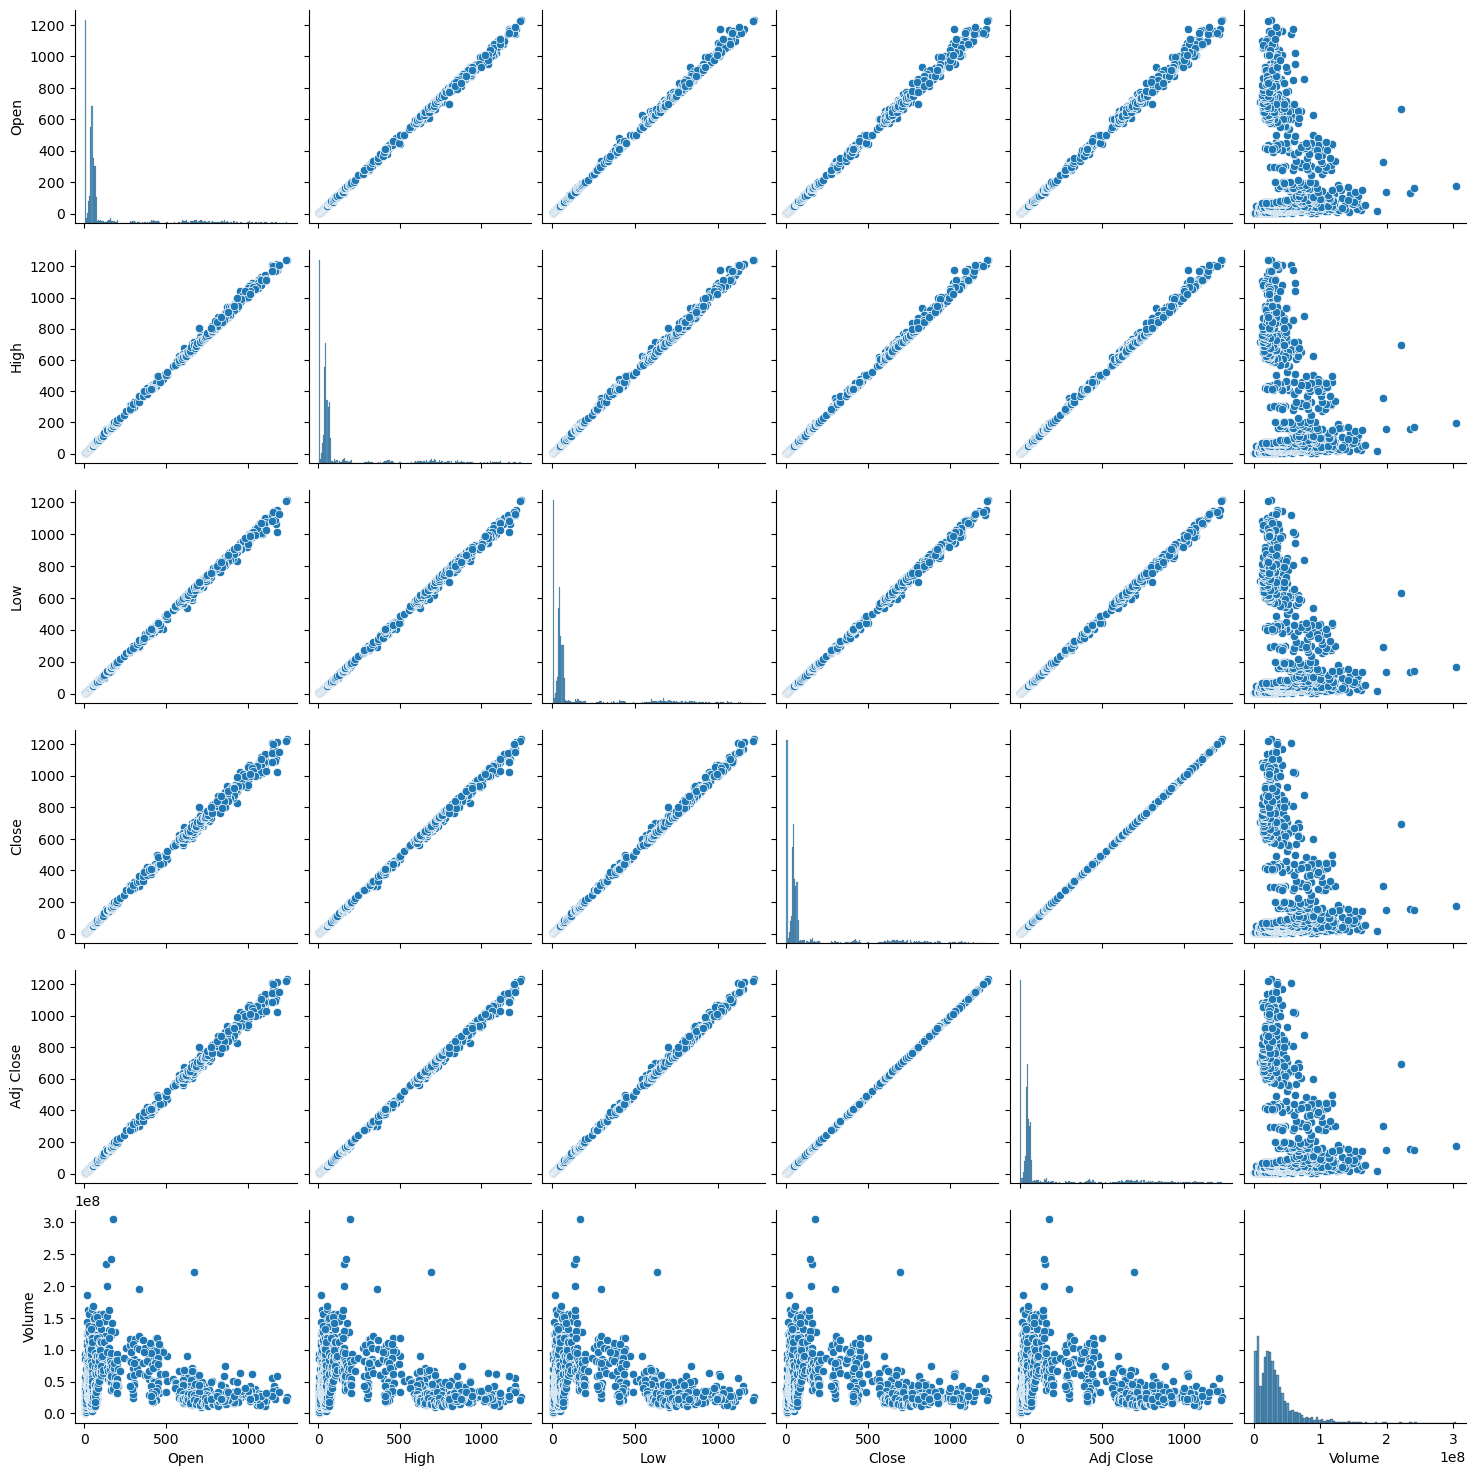

In [9]:
sns.pairplot(df)

<BarContainer object of 2956 artists>

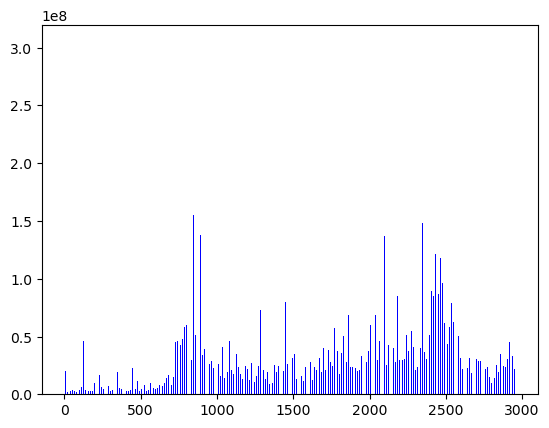

In [10]:
# sns.scatterplot(df["Adj Close"])
x = range(len(df["Volume"]))
plt.bar(x,df["Volume"], width=0.4, label='Column A', align='center', color='blue')


In [11]:
df[df['Close'] == df['Adj Close']].shape

(2956, 7)

In [12]:
df[['Adj Close','Close']]

,Adj Close,Close
0,4.778000,4.778000
1,4.766000,4.766000
2,4.392000,4.392000
3,3.840000,3.840000
4,3.222000,3.222000
...,...,...
2951,905.390015,905.390015
2952,921.159973,921.159973
2953,993.979980,993.979980
2954,999.109985,999.109985


In [13]:
df = df.drop(['Adj Close'], axis=1)

In [14]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

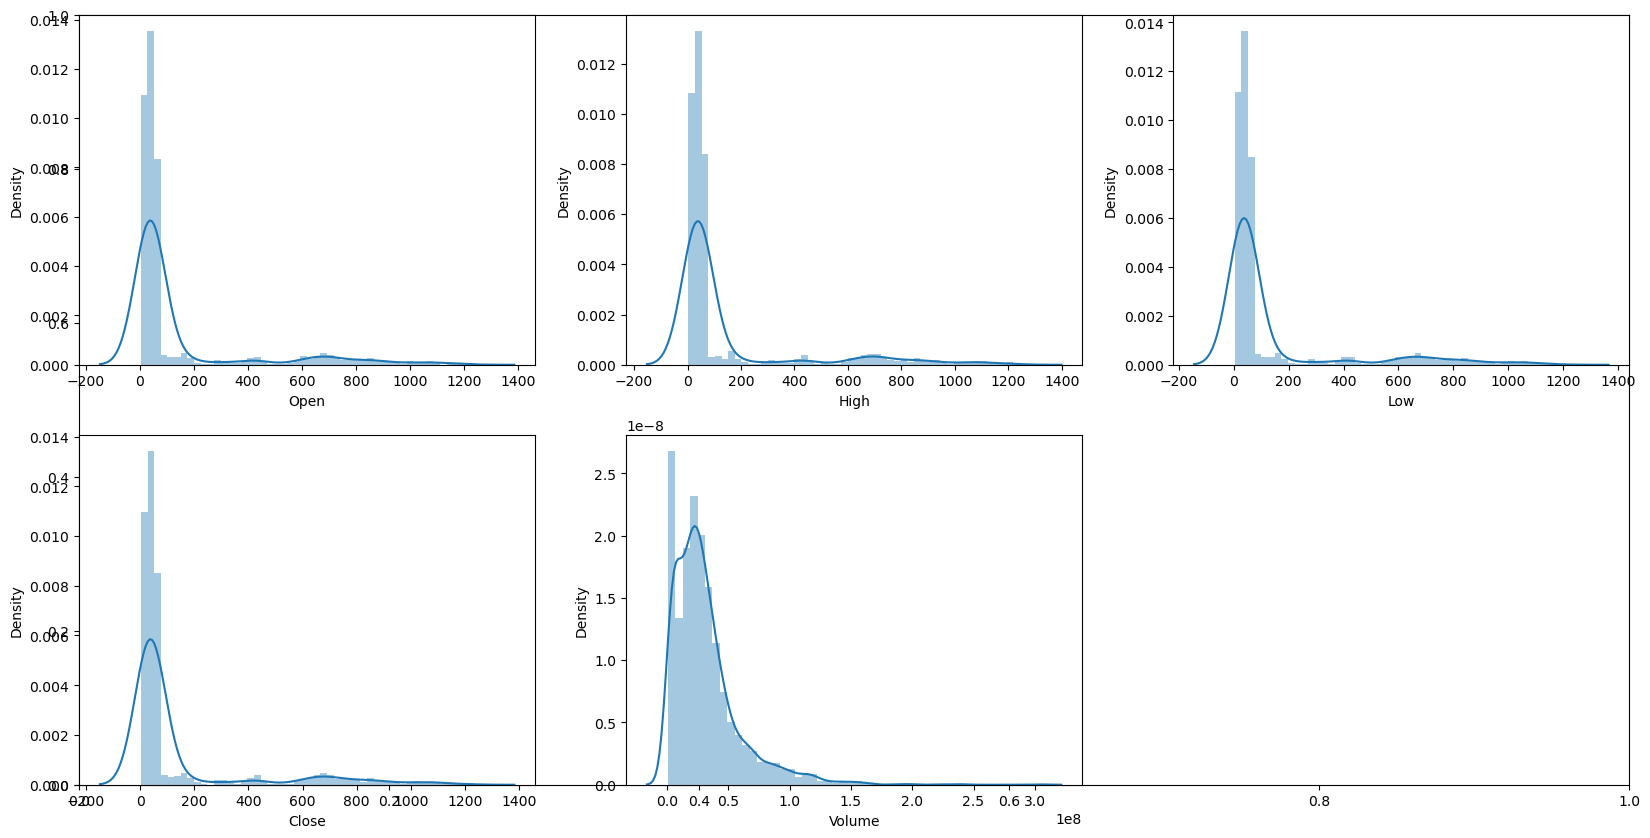

In [16]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

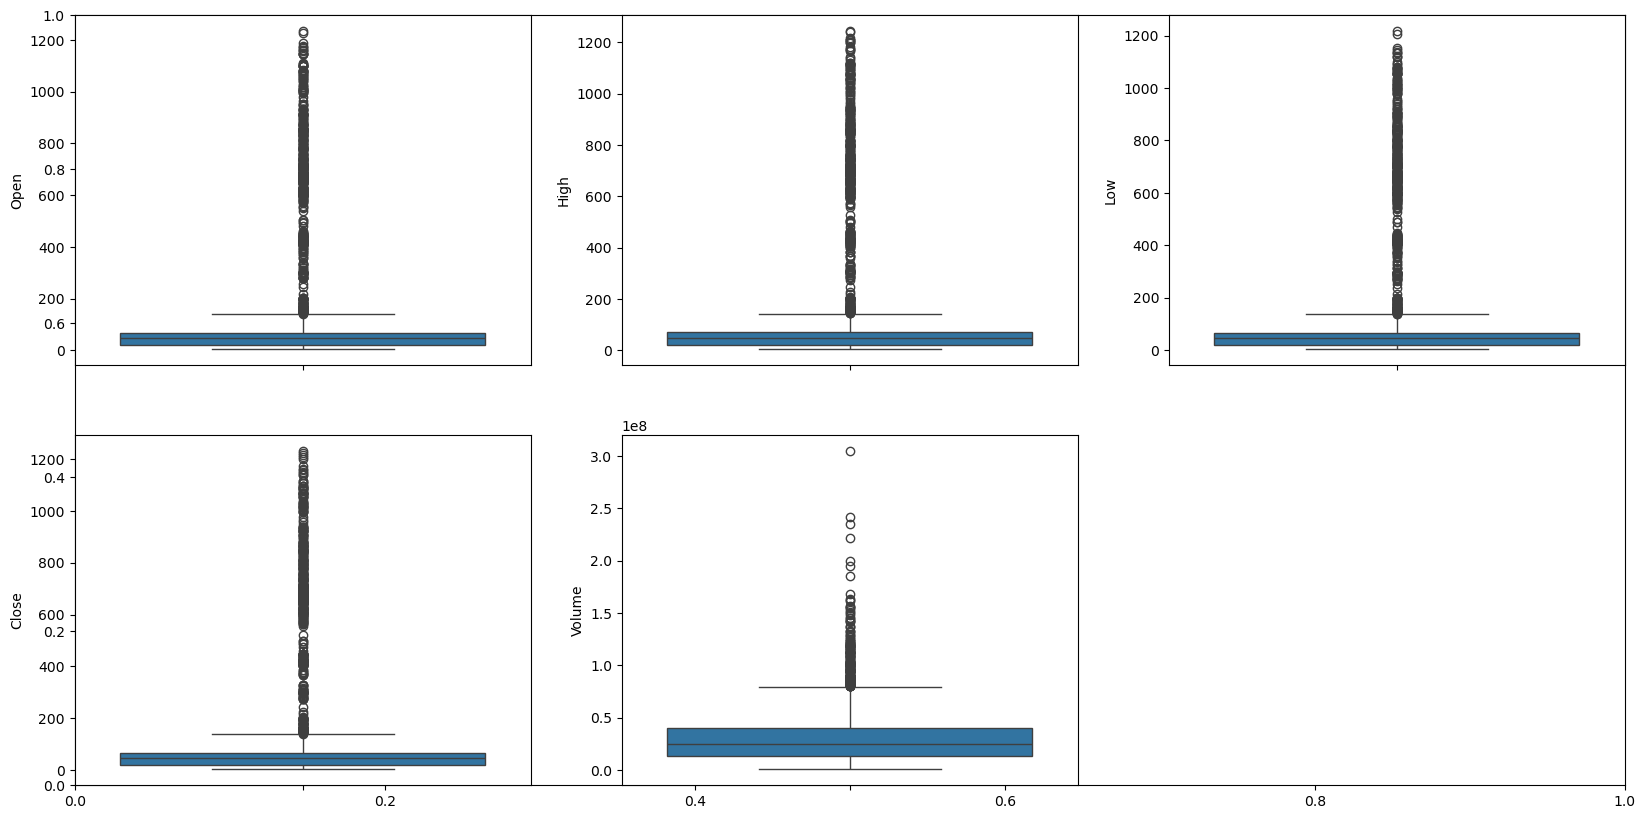

In [18]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

# Feature Engineering

In [19]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,34334500


In [26]:
df["Date"].dtype

dtype('O')

In [27]:
pd.to_datetime(df["Date"]).dtype

dtype('<M8[ns]')

In [28]:
df["Date"]=pd.to_datetime(df["Date"])

In [29]:
df.head(2)

,Date,Open,High,Low,Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,85935500


In [30]:
df["Date"].dt.day

0       29
1       30
2        1
3        2
4        6
        ..
2951    18
2952    21
2953    22
2954    23
2955    24
Name: Date, Length: 2956, dtype: int32

In [31]:
df["Date"].dt.month

0       6
1       6
2       7
3       7
4       7
       ..
2951    3
2952    3
2953    3
2954    3
2955    3
Name: Date, Length: 2956, dtype: int32

In [32]:
df["Date"].dt.year

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
2951    2022
2952    2022
2953    2022
2954    2022
2955    2022
Name: Date, Length: 2956, dtype: int32

In [33]:
df['day'] = df["Date"].dt.day
df['month'] = df["Date"].dt.month
df['year'] = df["Date"].dt.year

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,29,6,2010
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,30,6,2010
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,1,7,2010
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,2,7,2010
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,6,7,2010


In [34]:
np.where(df['month']%3==0,1,0)

array([1, 1, 0, ..., 1, 1, 1])

A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.


In [35]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,29,6,2010,1
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,30,6,2010,1
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,1,7,2010,0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,2,7,2010,0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,6,7,2010,0


In [36]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean()

In [37]:
data_grouped

,Open,High,Low,Close,Volume,day,month,is_quarter_end
year,,,,,,,,
2010,4.681600,4.815446,4.529215,4.668369,7.898812e+06,16.030769,9.453846,0.346154
2011,5.364397,5.476048,5.238833,5.360952,6.453077e+06,15.634921,6.547619,0.345238
2012,6.240624,6.361832,6.109176,6.233720,6.148980e+06,15.776000,6.500000,0.328000
2013,20.883286,21.370603,20.355976,20.880246,4.203861e+07,15.650794,6.543651,0.321429
2014,44.683079,45.489976,43.841222,44.665817,3.456987e+07,15.761905,6.551587,0.337302
2015,45.966389,46.676333,45.254127,46.008580,2.159162e+07,15.750000,6.567460,0.345238
2016,42.011690,42.686699,41.257230,41.953452,2.306273e+07,15.682540,6.555556,0.341270
2017,62.859243,63.690119,61.937394,62.863259,3.167393e+07,15.800797,6.533865,0.338645
2018,63.436693,64.738725,62.110462,63.461984,4.306053e+07,15.796813,6.505976,0.318725


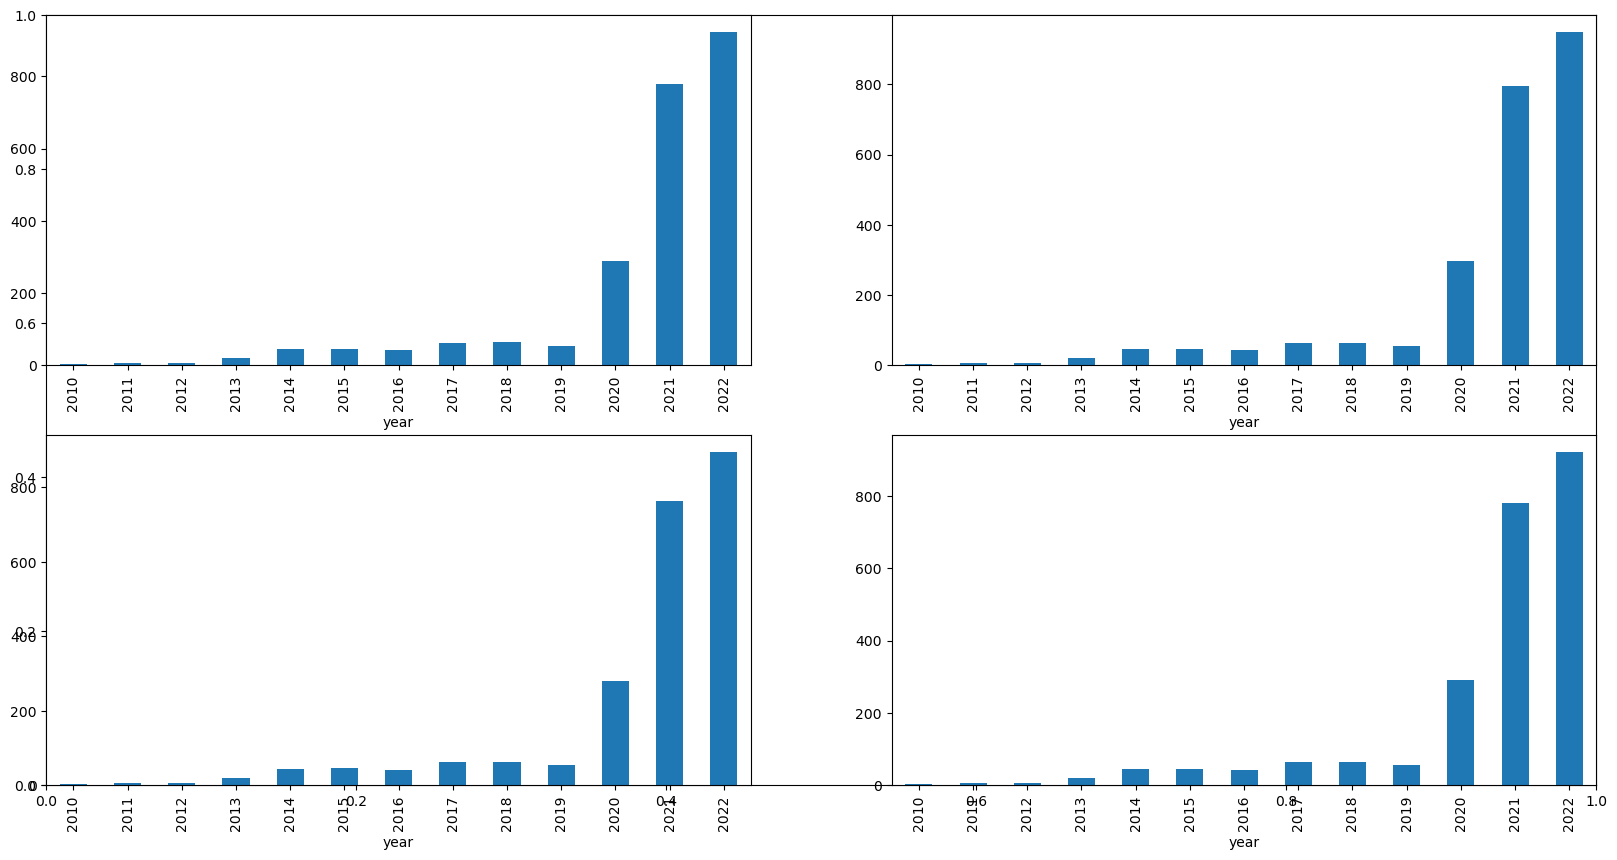

In [38]:
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [39]:
df.drop('Date', axis=1).groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,136.474690,139.523037,133.361644,136.531872,3.194378e+07,15.701987,6.124300,2015.855833
1,143.073168,146.216652,139.506757,143.171146,3.007048e+07,15.736153,7.489426,2015.852971


In [40]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

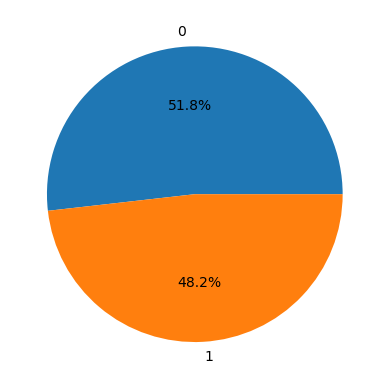

In [41]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

In [61]:
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,29,6,2010,1,-0.978,-1.492,0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,30,6,2010,1,0.392,-1.424,0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,1,7,2010,0,0.608,-1.130,0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,2,7,2010,0,0.760,-0.878,0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,6,7,2010,0,0.778,-0.834,0


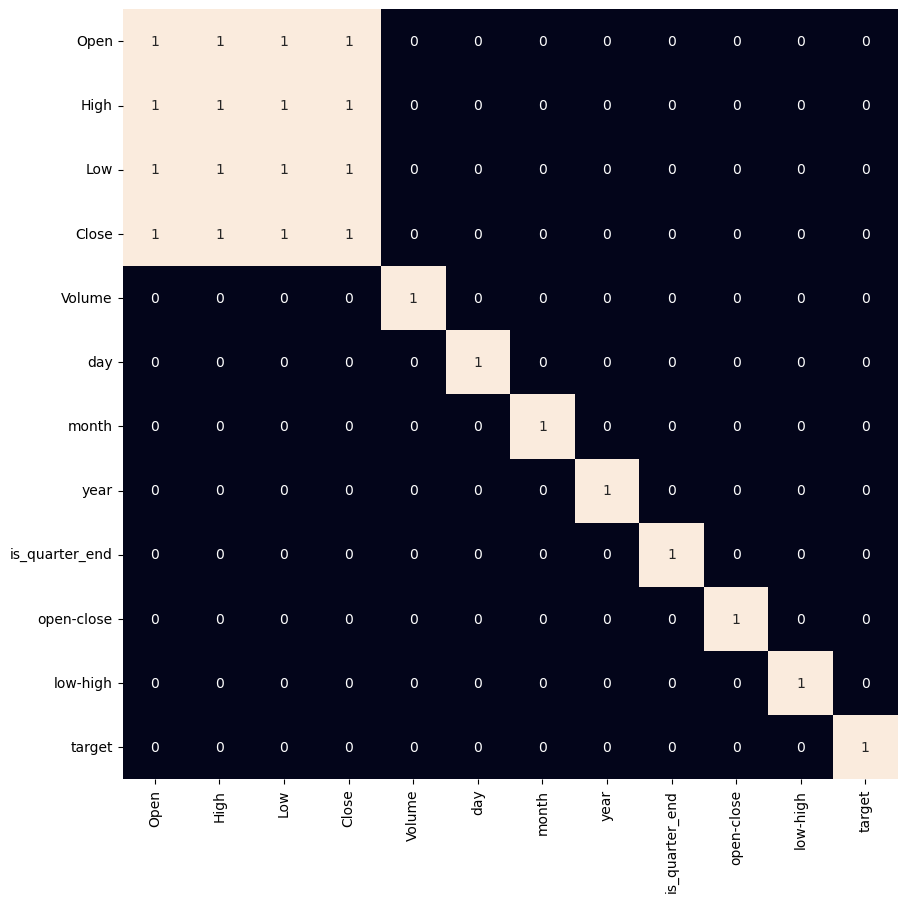

In [43]:
plt.figure(figsize=(10, 10)) 

# As our concern is with the highly 
# correlated features only so, we will visualize 
# our heatmap as per that criteria only. 
sns.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

# This code is modified by Susobhan Akhuli

In [44]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2660, 3) (296, 3)


In [48]:
models = [LogisticRegression(), SVC(kernel ='rbf',random_state=0, probability=True), XGBClassifier()]

In [49]:
for i in range(3):
    models[i].fit(X_train, Y_train)
    print(f'{models[i]} : ')
    print('Training Accuracy : ',metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ',metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print("#############################")
    

LogisticRegression() : 
Training Accuracy :  0.5145097983728333
Validation Accuracy :  0.5385531135531135
#############################
SVC(probability=True, random_state=0) : 
Training Accuracy :  0.4697448885744606
Validation Accuracy :  0.5144688644688645
#############################
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              n

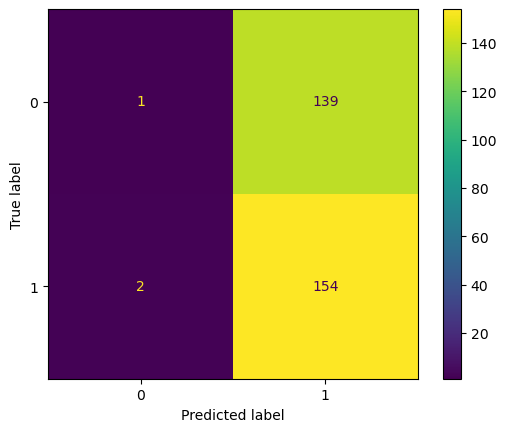

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()

# This code is modified by Susobhan Akhuli

In [59]:
models[0]

LogisticRegression()

In [60]:
Y_valid

607     0
1733    1
2303    0
1961    0
2907    1
       ..
194     0
2517    1
2684    1
331     0
368     0
Name: target, Length: 296, dtype: int32